In [1]:
import numpy as np

Function f given by Exercise 02 Problem 3:
$$
    f(x) = -6\pi\cos(3\pi x)+9\pi^2 x\sin(3\pi x)
$$

In [2]:
def f(x):
    """the right-hand side of the differential equation"""
    return -6 * np.pi * np.cos(3 * np.pi * x) + 9 * (np.pi**2) * x * np.sin(
        3 * np.pi * x
    )

Original function:
$$
    u(x) = x\sin(3\pi x)
$$

In [3]:
def u(x):
    """the exact solution of the differential equation"""
    return x * np.sin(3 * np.pi * x)

In [4]:
def gen_val(n, h, a, y):
    """generate the values of the function y at the points x_i"""
    y = np.zeros(n - 1)
    for i in range(n - 1):
        y[i] = -u(a + (i + 1) * h) * (h**2)
    return y

Matrix $A$:

$$
A = \frac{1}{h^2}
\left(
\begin{matrix}
2 & -1 & 0 &  & \dots & & 0 \\
-1 & 2 & -1 & 0 & & \dots & 0 \\
0 & -1 & 2 & -1 & 0 & \dots & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
0 & \dots & & 0 & -1 & 2 & -1 \\
0 & & \dots & & 0 & -1 & 2
\end{matrix}
\right)
$$


In [5]:
def gen_A(n):
    """generate the matrix A of the linear system of equations Au=p"""
    n = n - 1
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i - 1] = -1
        if i < n - 1:
            A[i, i + 1] = -1
    return A * ((n + 1) ** 2)


gen_A(8)

array([[128., -64.,   0.,   0.,   0.,   0.,   0.],
       [-64., 128., -64.,   0.,   0.,   0.,   0.],
       [  0., -64., 128., -64.,   0.,   0.,   0.],
       [  0.,   0., -64., 128., -64.,   0.,   0.],
       [  0.,   0.,   0., -64., 128., -64.,   0.],
       [  0.,   0.,   0.,   0., -64., 128., -64.],
       [  0.,   0.,   0.,   0.,   0., -64., 128.]])

$$
p = 
\left(
\begin{matrix}
f_1 + \frac{a}{h^2} \\
f_2 \\
\vdots \\
f_{n-1} + \frac{b}{h^2}
\end{matrix}
\right)
$$

In [6]:
def gen_p(n, f, a, b):
    """generate the vector p of the linear system of equations Au=p"""
    p = np.zeros((n - 1, 1))
    p[0] = f[0] + a * (n**2)
    for i in range(1, n - 2):
        p[i] = f[i]
    p[n - 2] = f[n - 2] + b * (n**2)
    return p

In [7]:
def gen_matrix(n, h, a, b):
    """
    generate the matrix A and the vector p of the linear system of equations Au=p
    Parameters:
    n: number of intervals
    h: step size
    a: u(0)
    b: u(1)
    """
    A = gen_A(n)
    f_ls = gen_val(n, h, a, f)
    p = gen_p(n, f_ls, a, b)
    return A, p

In [8]:
def richardson(A, p, a_k, tol=1e-10, max_iter=100000):
    """
    solve the linear system of equations Au=p using the Richardson iteration method
    Parameters:
    A: matrix A
    p: vector p
    tol: tolerance
    max_iter: maximum number of iterations
    """
    x = np.zeros((A.shape[0], 1))
    for i in range(max_iter):
        r = p - A @ x
        if np.linalg.norm(r) < tol:
            return x, i

        x = x + a_k * r
        if True in np.isnan(x):
            print("x contains nan", i)
            return x, i
    return x, i

In [9]:
def eigenval_k(k, n):
    """
    calculate the spectral radius of the matrix A
    """
    return 4 * n**2 * (np.sin((np.pi * k) / (2 * n))) ** 2

In [10]:
def eigenvals(n):
    """
    calculate the eigenvalues of the matrix A
    """

    return np.array([eigenval_k(k, n) for k in range(1, n)])

In [11]:
a = 0
b = 0
n_ls = np.array([8, 16, 32, 64, 128, 256])


for n in n_ls:
    A, p = gen_matrix(n, np.float32(1 / n), a, b)
    for omega in np.linspace(0.1, 0.9, 9):
        result = richardson(
            A, p, omega / np.max(eigenvals(n)), tol=1e-10, max_iter=100000
        )
        print(f"n: {n}, omega: {omega:.1f}, iter: {result[1]}")

n: 8, omega: 0.1, iter: 1169
n: 8, omega: 0.2, iter: 580
n: 8, omega: 0.3, iter: 384
n: 8, omega: 0.4, iter: 286
n: 8, omega: 0.5, iter: 227
n: 8, omega: 0.6, iter: 188
n: 8, omega: 0.7, iter: 160
n: 8, omega: 0.8, iter: 139
n: 8, omega: 0.9, iter: 122
n: 16, omega: 0.1, iter: 4385
n: 16, omega: 0.2, iter: 2189
n: 16, omega: 0.3, iter: 1456
n: 16, omega: 0.4, iter: 1090
n: 16, omega: 0.5, iter: 871
n: 16, omega: 0.6, iter: 724
n: 16, omega: 0.7, iter: 620
n: 16, omega: 0.8, iter: 541
n: 16, omega: 0.9, iter: 480


n: 32, omega: 0.1, iter: 16444
n: 32, omega: 0.2, iter: 8218
n: 32, omega: 0.3, iter: 5476
n: 32, omega: 0.4, iter: 4105
n: 32, omega: 0.5, iter: 3283
n: 32, omega: 0.6, iter: 2734
n: 32, omega: 0.7, iter: 2343


n: 32, omega: 0.8, iter: 2049
n: 32, omega: 0.9, iter: 1820


n: 64, omega: 0.1, iter: 61443


n: 64, omega: 0.2, iter: 30718
n: 64, omega: 0.3, iter: 20476


n: 64, omega: 0.4, iter: 15356
n: 64, omega: 0.5, iter: 12283
n: 64, omega: 0.6, iter: 10235


n: 64, omega: 0.7, iter: 8772
n: 64, omega: 0.8, iter: 7674
n: 64, omega: 0.9, iter: 6821


n: 128, omega: 0.1, iter: 99999


n: 128, omega: 0.2, iter: 99999


n: 128, omega: 0.3, iter: 76161


n: 128, omega: 0.4, iter: 57119


n: 128, omega: 0.5, iter: 45694


n: 128, omega: 0.6, iter: 38077


n: 128, omega: 0.7, iter: 32637


n: 128, omega: 0.8, iter: 28556


n: 128, omega: 0.9, iter: 25383


n: 256, omega: 0.1, iter: 99999


n: 256, omega: 0.2, iter: 99999


n: 256, omega: 0.3, iter: 99999


n: 256, omega: 0.4, iter: 99999


n: 256, omega: 0.5, iter: 99999


n: 256, omega: 0.6, iter: 99999


n: 256, omega: 0.7, iter: 99999


n: 256, omega: 0.8, iter: 99999


n: 256, omega: 0.9, iter: 93876


In [12]:
data = []

for n in n_ls:
    A, p = gen_matrix(n, np.float32(1 / n), a, b)
    for omega in np.linspace(0.1, 0.9, 9):
        result = richardson(
            A, p, omega / np.max(eigenvals(n)), tol=1e-10, max_iter=100000
        )
        data.append((n, omega, result[1]))

To show the results, we will draw a figure.

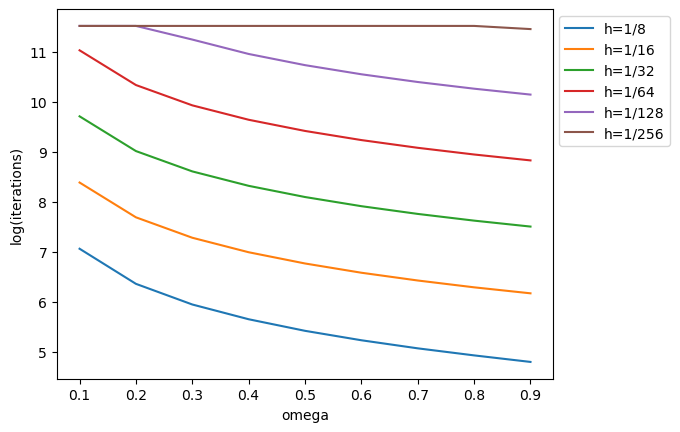

In [13]:
from matplotlib import pyplot as plt


for n in n_ls:
    x = []
    y = []
    for d in data:
        if d[0] == n:
            x.append(d[1])
            y.append(np.log(d[2]))

    plt.plot(x, y, label=f"h=1/{n}")

plt.xlabel("omega")
plt.ylabel("log(iterations)")
plt.legend(bbox_to_anchor=(1.25, 1))
# plt.savefig("richardson.png", bbox_inches="tight", dpi=300)